In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor

from sklearn.tree import DecisionTreeRegressor

In [2]:
import matplotlib.colors as colors
%matplotlib inline
#graphical example
import time
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
#this next line is only needed in iPython notebooks
%matplotlib inline 
import math
import matplotlib.font_manager as fm
import matplotlib.ticker as mtick
font = fm.FontProperties(size = 12)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
def hide_spines(intx=False,inty=False):
    """Hides the top and rightmost axis spines from view for all active
    figures and their respective axes."""

    # Retrieve a list of all current figures.
    figures = [x for x in matplotlib._pylab_helpers.Gcf.get_all_fig_managers()]
    if (plt.gca().get_legend()):
        plt.setp(plt.gca().get_legend().get_texts(), fontproperties=font) 
    for figure in figures:
        # Get all Axis instances related to the figure.
        for ax in figure.canvas.figure.get_axes():
            # Disable spines.
            ax.spines['right'].set_color('none')
            ax.spines['top'].set_color('none')
            # Disable ticks.
            ax.xaxis.set_ticks_position('bottom')
            ax.yaxis.set_ticks_position('left')
           # ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda v,_: ("10$^{%d}$" % math.log(v,10)) ))
            for label in ax.get_xticklabels() :
                label.set_fontproperties(font)
            for label in ax.get_yticklabels() :
                label.set_fontproperties(font)
            #ax.set_xticklabels(ax.get_xticks(), fontproperties = font)
            ax.set_xlabel(ax.get_xlabel(), fontproperties = font)
            ax.set_ylabel(ax.get_ylabel(), fontproperties = font)
            ax.set_title(ax.get_title(), fontproperties = font)
            if (inty):
                ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))
            if (intx):
                ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))
def show(nm,a=0,b=0,show=1):
    hide_spines(a,b)
    #ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda v,_: ("10$^{%d}$" % math.log(v,10)) ))
    #plt.yticks([1,1e-2,1e-4,1e-6,1e-8,1e-10,1e-12], labels)
    #ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda v,_: ("10$^{%d}$" % math.log(v,10)) ))
    if (len(nm)>0):
        plt.savefig(nm+".pdf",bbox_inches='tight');
    if show:
        plt.show()
    else:
        plt.close()

In [3]:
# Create a random dataset
#rng = np.random.RandomState(1)
I = 201
X = np.random.normal(loc=[0,0],scale=[1.25,1.25],size=[I,2])
print(X.shape)

y = 2*X[:,0]**2+X[:,1]**2
y[(X[:,0]-3)**2+(X[:,1]+3)**2 < np.power(4,2)] = 10
y[(X[:,0]+2)**2+(X[:,1]-2)**2 < np.power(1,2)] = -10

(201, 2)


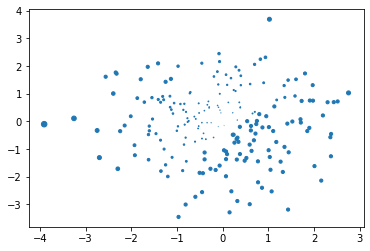

In [4]:
plt.scatter(X[:,0],X[:,1],s=np.abs(y))

In [5]:
train_size = int(1*I)-1
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_size, test_size=int(I-train_size), random_state=4)

regr_rf = RandomForestRegressor(n_estimators=10, max_depth=100)
regr_rf.fit(X_train, y_train)
print(regr_rf)

RandomForestRegressor(max_depth=100, n_estimators=10)


(300, 300)


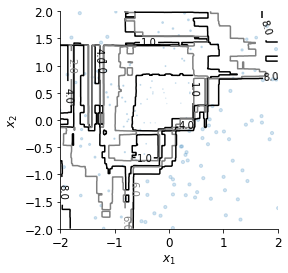

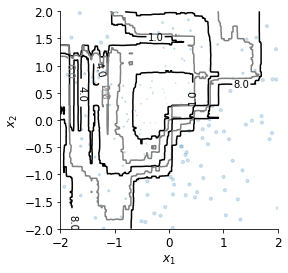

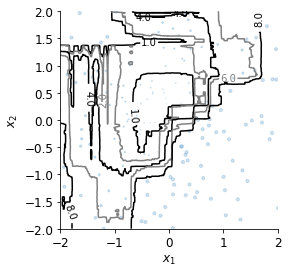

In [6]:
max_depth = 3000
Np = 300
xx,yy = np.meshgrid(np.linspace(-2,2,Np),np.linspace(-2,2,Np))
print(xx.shape)
Xgrid = np.zeros([Np**2,2])
Xgrid[:,0] = xx.flatten()
Xgrid[:,1] = yy.flatten()
ygrid = regr_rf.predict(Xgrid)
for nest in [10,100,1000]:
    regr_rf = RandomForestRegressor(n_estimators=nest, max_depth=max_depth)
    regr_rf.fit(X_train, y_train)
    fig, ax = plt.subplots()
    
    ygrid = regr_rf.predict(Xgrid)
    CS = ax.contour(xx,yy,ygrid.reshape((Np,Np)),levels=(1,2,4,6,8),colors=("k","gray"))
    ax.clabel(CS, inline=1, fontsize=10,fmt='%1.1f')
    ax.axis("square")
    ax.scatter(X_train[:,0],X_train[:,1],s=np.abs(y_train),alpha=0.2)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    show("rf200-2-"+str(nest))

In [7]:
Np = 300
xx,yy = np.meshgrid(np.linspace(-2,2,Np),np.linspace(-2,2,Np))
print(xx.shape)
Xgrid = np.zeros([Np**2,2])
Xgrid[:,0] = xx.flatten()
Xgrid[:,1] = yy.flatten()
ygrid = regr_rf.predict(Xgrid)

(300, 300)


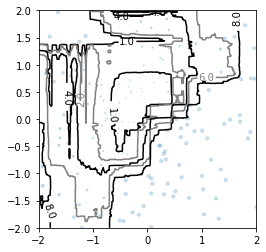

In [8]:
fig, ax = plt.subplots()

CS = ax.contour(xx,yy,ygrid.reshape((Np,Np)),levels=(1,2,4,6,8),colors=("k","gray"))
ax.clabel(CS, inline=1, fontsize=10,fmt='%1.1f')
ax.axis("square")
ax.scatter(X_train[:,0],X_train[:,1],s=np.abs(y_train),alpha=0.2)

In [9]:
ytrue = 2*Xgrid[:,0]**2+Xgrid[:,1]**2
ytrue[(Xgrid[:,0]-3)**2+(Xgrid[:,1]+3)**2 < np.power(4,2)] = 10
ytrue[(Xgrid[:,0]+2)**2+(Xgrid[:,1]-2)**2 < np.power(1,2)] = -10

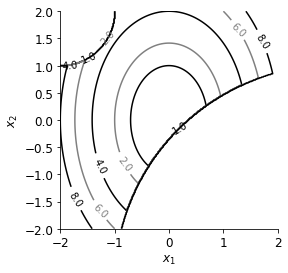

In [10]:
fig, ax = plt.subplots()

CS = ax.contour(xx,yy,ytrue.reshape((Np,Np)),levels=(1,2,4,6,8),colors=("k","gray"))
ax.clabel(CS, inline=1, fontsize=10,fmt='%1.1f')
ax.axis("square")
#ax.scatter(X_train[:,0],X_train[:,1],s=np.abs(y),alpha=0.2)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
show("true_contour")

In [11]:
tree = DecisionTreeRegressor()
print(tree.fit(X_train, y_train))
ygrid_tr = tree.predict(Xgrid)

DecisionTreeRegressor()


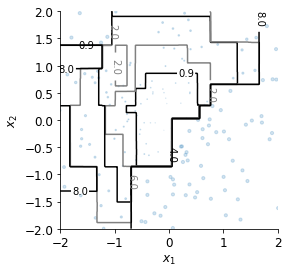

In [12]:
fig, ax = plt.subplots()

CS = ax.contour(xx,yy,ygrid_tr.reshape((Np,Np)),levels=(0.9,2,4,6,8),colors=("k","gray"))
ax.clabel(CS, inline=1, fontsize=10,fmt='%1.1f')
ax.axis("square")
ax.scatter(X_train[:,0],X_train[:,1],s=np.abs(y_train),alpha=0.2)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
show("tree_contour-200-2")

In [13]:
max_depth = 3000
I = 200
X = np.random.normal(loc=[0,0],scale=[1.25,1.25],size=[I,2])
print(X.shape)

y = 2*X[:,0]**2+X[:,1]**2
y[(X[:,0]-3)**2+(X[:,1]+3)**2 < np.power(4,2)] = 10
y[(X[:,0]+2)**2+(X[:,1]-2)**2 < np.power(1,2)] = -10
train_size = int(0.5*I)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_size, test_size=int(I-train_size), random_state=4)
vals = np.arange(1,200)
errors = np.zeros(vals.size)
X = np.random.normal(loc=[0,0],scale=[1.25,1.25],size=[I,2])
y = 2*X[:,0]**2+X[:,1]**2
y[(X[:,0]-3)**2+(X[:,1]+3)**2 < np.power(4,2)] = 10
y[(X[:,0]+2)**2+(X[:,1]-2)**2 < np.power(1,2)] = -10
i = 0
for nest in vals:
    regr_rf = RandomForestRegressor(n_estimators=nest, max_depth=max_depth, oob_score=True)
    regr_rf.fit(X, y)
    errors[i] = 1-regr_rf.oob_score_
    i += 1

(200, 2)


/Users/rmcclarr/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/rmcclarr/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/rmcclarr/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/rmcclarr/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to comput

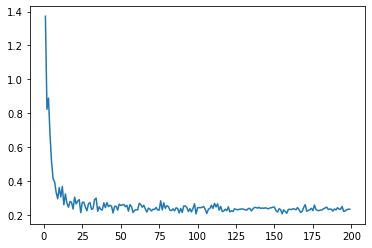

In [14]:
fig, ax = plt.subplots()
plt.plot(vals,errors)

In [15]:
I = 2000
max_depth = 3000
X = np.random.normal(loc=[0,0],scale=[1.25,1.25],size=[I,2])
print(X.shape)

y = 2*X[:,0]**2+X[:,1]**2
y[(X[:,0]-3)**2+(X[:,1]+3)**2 < np.power(4,2)] = 10
y[(X[:,0]+2)**2+(X[:,1]-2)**2 < np.power(1,2)] = -10
train_size = int(0.5*I)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_size, test_size=int(I-train_size), random_state=4)
vals = np.arange(1,200)
errors2 = np.zeros(vals.size)
X = np.random.normal(loc=[0,0],scale=[1.25,1.25],size=[I,2])
y = 2*X[:,0]**2+X[:,1]**2
y[(X[:,0]-3)**2+(X[:,1]+3)**2 < np.power(4,2)] = 10
y[(X[:,0]+2)**2+(X[:,1]-2)**2 < np.power(1,2)] = -10
i = 0
for nest in vals:
    regr_rf = RandomForestRegressor(n_estimators=nest, max_depth=max_depth, oob_score=True)
    regr_rf.fit(X, y)
    errors2[i] = 1-regr_rf.oob_score_
    i += 1

(2000, 2)


/Users/rmcclarr/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/rmcclarr/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/rmcclarr/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/rmcclarr/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to comput

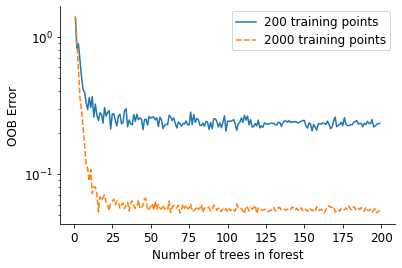

In [16]:
fig, ax = plt.subplots()
plt.plot(vals,errors,label="200 training points")

plt.semilogy(vals,errors2,"--",label="2000 training points")
plt.legend(loc="best")
plt.xlabel("Number of trees in forest")
plt.ylabel("OOB Error")
show("OOB")

In [17]:
def compute_unc(X,mod):
    vs = np.zeros((mod.n_estimators,X.shape[0]))
    for i in range(mod.n_estimators):
        vs[i,:] = mod.estimators_[i].predict(X)
    return np.mean(vs,axis=0), np.std(vs,axis=0)

In [18]:
Np = 100
xx,yy = np.meshgrid(np.linspace(-2,2,Np),np.linspace(-2,2,Np))
print(xx.shape)
Xgrid = np.zeros([Np**2,2])
Xgrid[:,0] = xx.flatten()
Xgrid[:,1] = yy.flatten()
ygrid = regr_rf.predict(Xgrid)
ystd = ygrid*0
tmp, ystd = compute_unc(Xgrid,regr_rf)

(100, 100)


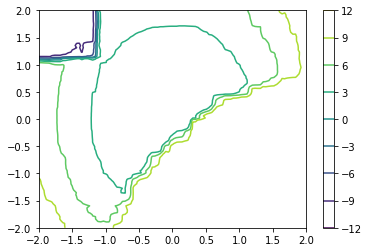

In [19]:
plt.contour(xx,yy,(ygrid).reshape(Np,Np))
plt.colorbar()

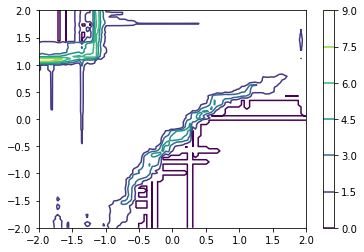

In [20]:
plt.contour(xx,yy,(ystd).reshape(Np,Np))
plt.colorbar()